In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from lxml import etree
import numpy as np
import glob
from matplotlib.patches import Rectangle

In [3]:
img = tf.io.read_file(r'C:\Users\hang\Desktop\tensorflow\C\Dataset\D\JPEGImage\000001.jpg')

In [4]:
img = tf.image.decode_jpeg(img)

In [5]:
img.shape

TensorShape([600, 600, 3])

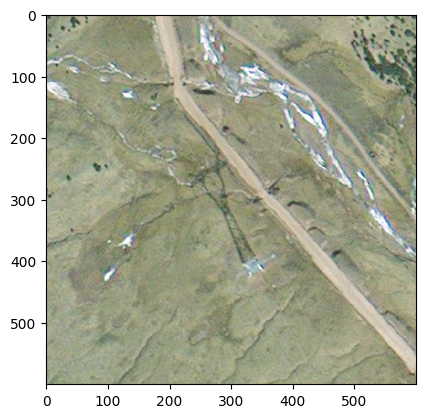

In [6]:
plt.imshow(img)

In [7]:
xml = open(r'C:\Users\hang\Desktop\tensorflow\C\Dataset\D\Annotation\000001.xml').read()

In [8]:
sel = etree.HTML(xml)

In [9]:
width = int(sel.xpath('//size/width/text()')[0])

In [10]:
height = int(sel.xpath('//size/height/text()')[0])

In [11]:
xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
ymin = int(sel.xpath('//bndbox/ymin/text()')[0])
ymax = int(sel.xpath('//bndbox/ymax/text()')[0])

In [12]:
height, xmin, xmax, ymin, ymax

(600, 309, 374, 389, 424)

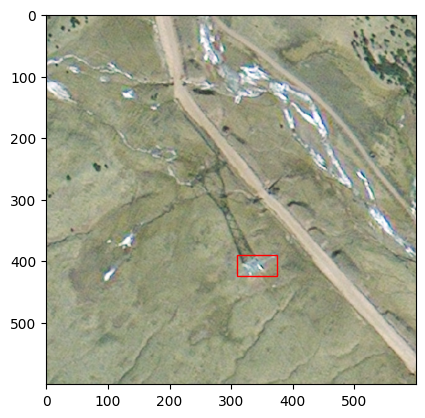

In [13]:
plt.imshow(img)
rect = Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), fill = False, color = 'red')
ax = plt.gca()
ax.axes.add_patch(rect)

In [14]:
img = tf.image.resize(img, [224, 224])
img = img / 255

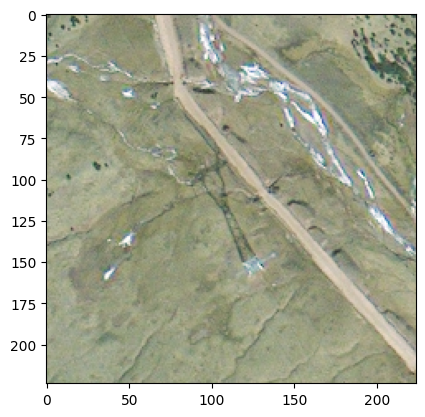

In [15]:
plt.imshow(img.numpy())

In [16]:
xmin = (xmin / width) * 224
xmax = (xmax / width) * 224
ymin = (ymin / height) * 224
ymax = (ymax / height) * 224

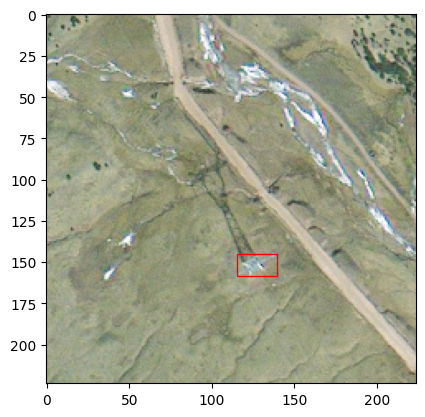

In [17]:
plt.imshow(img)
rect = Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), fill = False, color = 'red')
ax = plt.gca()
ax.axes.add_patch(rect)

In [18]:
#创建输入管道
images = glob.glob(r'C:\Users\hang\Desktop\tensorflow\C\Dataset\D\JPEGImage\*.jpg')

In [19]:
images[:5]

['C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000001.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000002.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000003.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000004.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000005.jpg']

In [20]:
images[-5:]

['C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000396.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000397.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000398.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000399.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000400.jpg']

In [21]:
len(images)

400

In [22]:
xmls = glob.glob(r'C:\Users\hang\Desktop\tensorflow\C\Dataset\D\Annotation\*.xml')

In [23]:
xmls[: 3]

['C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\Annotation\\000001.xml',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\Annotation\\000002.xml',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\Annotation\\000003.xml']

In [24]:
len(xmls)

400

In [25]:
xmls[0].split('\\')[-1].split('.xml')[0]

'000001'

In [26]:
names = [x.split('\\')[-1].split('.xml')[0] for x in xmls] 

In [27]:
len(names)

400

In [28]:
imgs_train = [img for img in images if (img.split('\\')[-1].split('.jpg')[0]) in names]

In [29]:
len(imgs_train)

400

In [30]:
imgs_test =  [img for img in images if (img.split('\\')[-1].split('.jpg')[0]) not in names]

In [31]:
imgs_train.sort(key = lambda x : x.split('\\')[-1].split('.jpg')[0])

In [32]:
xmls.sort(key = lambda x : x.split('\\')[-1].split('.xml')[0])

In [33]:
imgs_train[-5: ]

['C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000396.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000397.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000398.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000399.jpg',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\JPEGImage\\000400.jpg']

In [34]:
xmls[-5: ]

['C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\Annotation\\000396.xml',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\Annotation\\000397.xml',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\Annotation\\000398.xml',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\Annotation\\000399.xml',
 'C:\\Users\\hang\\Desktop\\tensorflow\\C\\Dataset\\D\\Annotation\\000400.xml']

In [35]:
# 解析出四个目标值
def to_labels(path):
    xml = open('{}'.format(path), encoding= 'utf-8').read()
    sel = etree.HTML(xml)
    width = int(sel.xpath('//size/width/text()')[0])
    height = int(sel.xpath('//size/height/text()')[0])
    xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
    xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
    ymin = float(sel.xpath('//bndbox/ymin/text()')[0])
    ymax = int(sel.xpath('//bndbox/ymax/text()')[0])
    return [xmin / width, ymin / height, xmax / width, ymax / height]

In [36]:
labels = [to_labels(path) for path in xmls]

In [37]:
labels[:3]

[[0.515, 0.6483333333333333, 0.6233333333333333, 0.7066666666666667],
 [0.17833333333333334, 0.45666666666666667, 0.28, 0.5366666666666666],
 [0.22, 0.515, 0.32166666666666666, 0.5683333333333334]]

In [38]:
out1, out2, out3, out4 = zip(*labels)

In [39]:
out1 = np.array(out1)
out2 = np.array(out2)
out3 = np.array(out3)
out4 = np.array(out4)

In [40]:
label_datasets = tf.data.Dataset.from_tensor_slices((out1, out2, out3, out4))

In [41]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels= 3)
    img = tf.image.resize(img, [224, 224])
    img = img/ 127.5 - 1
    return img

In [42]:
image_dataset = tf.data.Dataset.from_tensor_slices(imgs_train)

In [43]:
image_dataset = image_dataset.map(load_image)

In [44]:
image_dataset

<MapDataset shapes: (224, 224, 3), types: tf.float32>

In [45]:
dataset = tf.data.Dataset.zip((image_dataset, label_datasets))

In [46]:
dataset

<ZipDataset shapes: ((224, 224, 3), ((), (), (), ())), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

In [47]:
dataset = dataset.repeat().shuffle(len(imgs_train)).batch(21)

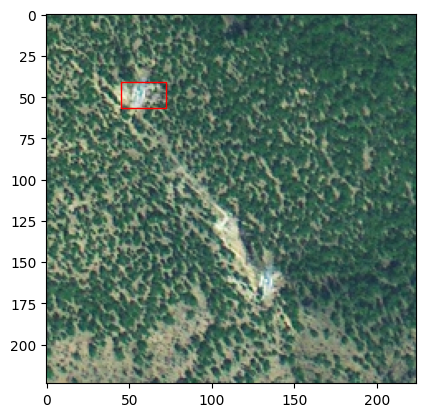

In [48]:
for img, label in dataset.take(1):
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img[0]))
    out1, out2, out3, out4 = label
    xmin, ymin, xmax, ymax = out1[0].numpy() * 224, out2[0].numpy() * 224, out3[0].numpy() * 224, out4[0].numpy() * 224
    rect = Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), fill = False, color = 'red')
    ax = plt.gca()
    ax.axes.add_patch(rect)

In [49]:
#创建图像定位的模型
xception = tf.keras.applications.Xception(weights = 'imagenet', include_top= False, input_shape= (224, 224, 3))


In [50]:
inputs = tf.keras.layers.Input(shape = (224, 224, 3))
x = xception(inputs)
x = tf.keras.layers.GlobalAvgPool2D()(x)
x = tf.keras.layers.Dense(2048, activation= 'relu')(x)
x = tf.keras.layers.Dense(256, activation= 'relu')(x)

out1 = tf.keras.layers.Dense(1)(x)
out2 = tf.keras.layers.Dense(1)(x)
out3 = tf.keras.layers.Dense(1)(x)
out4 = tf.keras.layers.Dense(1)(x)

prediction = [out1, out2, out3, out4]
model = tf.keras.models.Model(inputs = inputs, outputs = prediction)


In [51]:
model.compile(tf.keras.optimizers.Adam(learning_rate= 0.0001),
              loss = 'mse',
              metrics = ['mae']

)

In [52]:
EPOCHS = 5

In [53]:
history = model.fit(dataset, 
                    epochs= EPOCHS, 
                    steps_per_epoch= len(images) // 21
)


Epoch 1/5
19/19 [==============================] - 22s 640ms/step - loss: 0.2342 - dense_2_loss: 0.0422 - dense_3_loss: 0.0530 - dense_4_loss: 0.0789 - dense_5_loss: 0.0601 - dense_2_mae: 0.1601 - dense_3_mae: 0.1786 - dense_4_mae: 0.2202 - dense_5_mae: 0.1953
Epoch 2/5
19/19 [==============================] - 12s 638ms/step - loss: 0.1431 - dense_2_loss: 0.0331 - dense_3_loss: 0.0286 - dense_4_loss: 0.0475 - dense_5_loss: 0.0340 - dense_2_mae: 0.1449 - dense_3_mae: 0.1340 - dense_4_mae: 0.1755 - dense_5_mae: 0.1452
Epoch 3/5
 5/19 [======>.......................] - ETA: 9s - loss: 0.0774 - dense_2_loss: 0.0199 - dense_3_loss: 0.0153 - dense_4_loss: 0.0244 - dense_5_loss: 0.0178 - dense_2_mae: 0.1098 - dense_3_mae: 0.0992 - dense_4_mae: 0.1285 - dense_5_mae: 0.1060

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

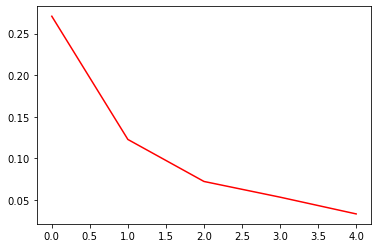

In [ ]:
loss = history.history['loss']
val_loss = history.history
epochs = range(EPOCHS)
plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'bo', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('EPOCHS')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

c:\Users\hang\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


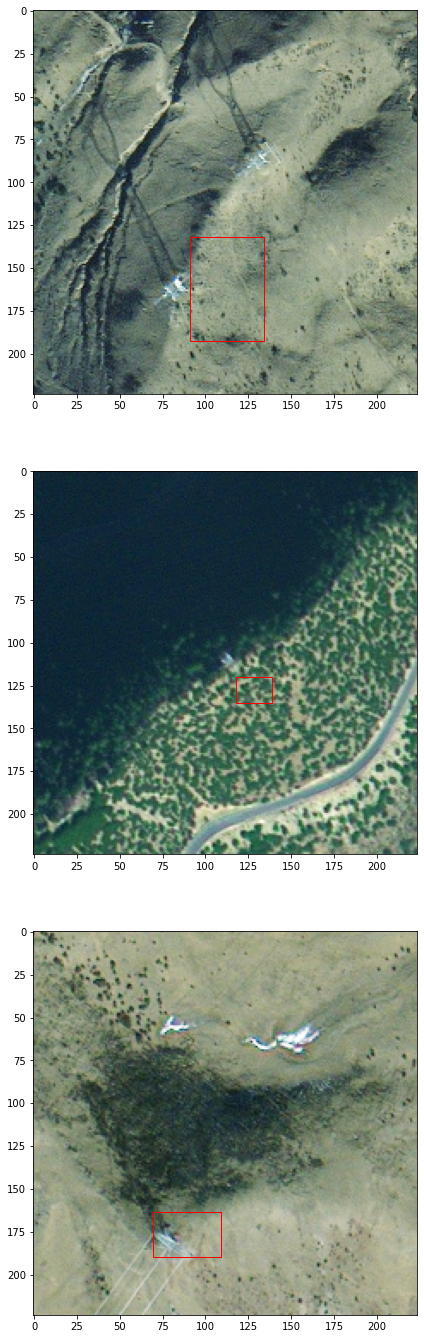

In [ ]:
model.save('detect_v1.h5')
new_model = tf.keras.models.load_model('detect_v1.h5')
plt.figure(figsize= (8, 24))
for img, _ in dataset.take(1):
    out1, out2, out3, out4 = new_model.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(img[i]))
        xmin, ymin, xmax, ymax = out1[i] * 224, out2[i] * 224, out3[i] * 224, out4[i] * 224
        rect = Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), fill = False, color = 'red')
        ax = plt.gca()
        ax.axes.add_patch(rect)
    
